In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
plt.style.use('ggplot')
#pd.set_option('max_columns',200)

In [2]:
Stocks = pd.read_csv('C:/Users/PC/Desktop/Data/all_stocks_5yr.csv', parse_dates=)

In [18]:
Stocks.shape

(619040, 7)

In [5]:
Stocks.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [6]:
Stocks.tail()

,date,open,high,low,close,volume,Name
619035,2018-02-01,76.84,78.27,76.69,77.82,2982259,ZTS
619036,2018-02-02,77.53,78.12,76.73,76.78,2595187,ZTS
619037,2018-02-05,76.64,76.92,73.18,73.83,2962031,ZTS
619038,2018-02-06,72.74,74.56,72.13,73.27,4924323,ZTS
619039,2018-02-07,72.70,75.00,72.69,73.86,4534912,ZTS


In [7]:
Stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    619040 non-null  object 
 1   open    619029 non-null  float64
 2   high    619032 non-null  float64
 3   low     619032 non-null  float64
 4   close   619040 non-null  float64
 5   volume  619040 non-null  int64  
 6   Name    619040 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 33.1+ MB


In [8]:
pd.to_datetime(Stocks['date'])

0        2013-02-08
1        2013-02-11
2        2013-02-12
3        2013-02-13
4        2013-02-14
            ...    
619035   2018-02-01
619036   2018-02-02
619037   2018-02-05
619038   2018-02-06
619039   2018-02-07
Name: date, Length: 619040, dtype: datetime64[ns]

In [10]:
Stocks['date'] = pd.to_datetime(Stocks['date'])

In [11]:
Stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    619040 non-null  datetime64[ns]
 1   open    619029 non-null  float64       
 2   high    619032 non-null  float64       
 3   low     619032 non-null  float64       
 4   close   619040 non-null  float64       
 5   volume  619040 non-null  int64         
 6   Name    619040 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 33.1+ MB


In [12]:
Stocks.describe()

,open,high,low,close,volume
count,619029.000000,619032.000000,619032.000000,619040.000000,6.190400e+05
mean,83.023334,83.778311,82.256096,83.043763,4.321823e+06
std,97.378769,98.207519,96.507421,97.389748,8.693610e+06
min,1.620000,1.690000,1.500000,1.590000,0.000000e+00
25%,40.220000,40.620000,39.830000,40.245000,1.070320e+06
50%,62.590000,63.150000,62.020000,62.620000,2.082094e+06
75%,94.370000,95.180000,93.540000,94.410000,4.284509e+06
max,2044.000000,2067.990000,2035.110000,2049.000000,6.182376e+08


In [23]:
Stocks['Name'].value_counts().sum()

619040

In [25]:
Stocks.isna().sum()

date       0
open      11
high       8
low        8
close      0
volume     0
Name       0
dtype: int64

In [27]:
Stocks.duplicated().sum()

0

Text(0, 0.5, 'counts')

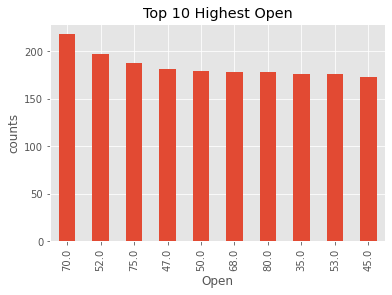

In [32]:
 ax = Stocks['open'].value_counts()\
    .head(10)\
    .plot(kind= 'bar', title ='Top 10 Highest Open')
 ax.set_xlabel('Open')
 ax.set_ylabel('counts')

Text(0, 0.5, 'counts')

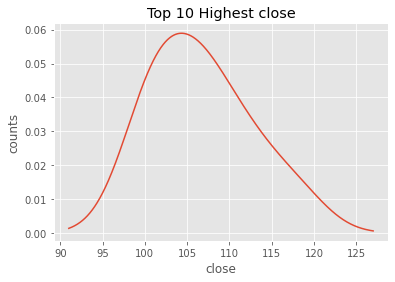

In [34]:
ax = Stocks['close'].value_counts()\
    .head(10)\
    .plot(kind= 'kde', title ='Top 10 Highest close')
ax.set_xlabel('close')
ax.set_ylabel('counts')

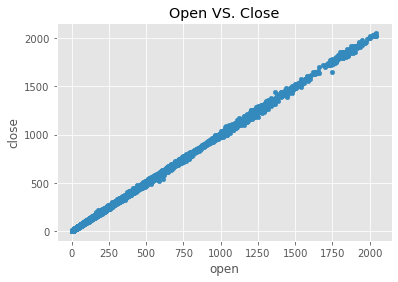

In [37]:
Stocks.plot(kind ='scatter',
           x = 'open',
           y = 'close', 
           title = 'Open VS. Close')
plt.show()

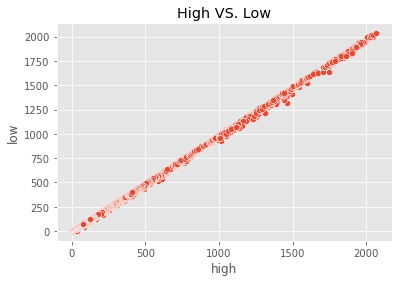

In [47]:
ax =sns.scatterplot(x = 'high',
               y = 'low',
                #hue = 'Name',
             data = Stocks)
ax.set_title('High VS. Low')
plt.show()

In [51]:
Stocks.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'Name'], dtype='object')

In [53]:
stocks_corr = Stocks[['open','high','low','close','volume']].dropna().corr()
stocks_corr

,open,high,low,close,volume
open,1.000000,0.999939,0.999928,0.999872,-0.142705
high,0.999939,1.000000,0.999903,0.999936,-0.142316
low,0.999928,0.999903,1.000000,0.999939,-0.143240
close,0.999872,0.999936,0.999939,1.000000,-0.142802
volume,-0.142705,-0.142316,-0.143240,-0.142802,1.000000
